In [2]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
import math, time

Speed at ramp: 31.28m/s
landing as angle 0, speed at 47.43m/s, jumped 147.90m


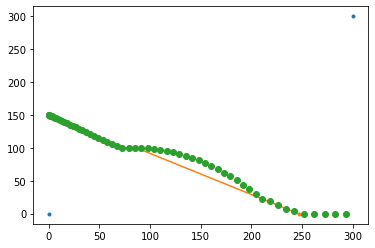

In [56]:
#dane
g=-9.81
height_inrun = 150
height_ramp = 100
length_ramp = 15
distance_max = height_inrun * 2

angle_inrun = 35/180 * math.pi
angle_slope = 32/180 * math.pi

distance_ramp = (height_inrun - height_ramp)/math.tan(angle_inrun)
length_slope = height_ramp / math.tan(angle_slope)
distance_slope= distance_ramp + length_ramp + length_slope
tan_inrun = math.tan(angle_inrun)
tan_slope = math.tan(angle_slope)
cos_inrun = math.cos(angle_inrun)
cos_slope = math.cos(angle_slope)
sin_inrun = math.sin(angle_inrun)
sin_slope = math.sin(angle_slope)

def draw_track(): #only gives arrays of coordinates
    #fix the axis frame
    axis_x = np.array([0,distance_max])
    axis_y = np.array([0,distance_max])
    plt.plot(axis_x,axis_y,'.')
    
    track_x = []
    track_y = []
    
    #draw the in-run
    track_x.append(0.0)
    track_y.append(height_inrun)
    track_x.append(distance_ramp)
    track_y.append(height_ramp)
    #draw the ramp
    track_x.append(distance_ramp + length_ramp)
    track_y.append(height_ramp)
    #draw the slope
    track_x.append(distance_slope)
    track_y.append(0)
    
    return (track_x,track_y)
    #plt.plot(track_x,track_y,'.-')
    #plt.show()
    
def ski_a_bit(posx,posy,vx,vy,timebit):
    #we calculate x,y separately
    #by default, we have
    gy=g
    gx=0
    
    #if the person is still on the in-run
    if posx < distance_ramp:
        #some special treatment - in-run logics
        gx= -g*sin_inrun*cos_inrun
        gy= g*(1-cos_inrun*cos_inrun)
    elif posx < distance_ramp + length_ramp:
        #some special treatment - ramp logics
        gx=0
        gy=0
        if vy!=0:
            vx=(vx**2 + vy**2)**0.5
            print('Speed at ramp: %.2fm/s' % vx)
        #enforce a zero vertical speed as the ramp is 'flat'
        vy=0
    elif posx < distance_slope:
        #special treatment for flying and landing on the slope
        slope_height_posx = (distance_slope - posx)* tan_slope
        if posy >= slope_height_posx -1.0:
            #must be flying
            #if it si in the sky, then there's not much to do
            gx=gx
            gy=gy
        else:
            #must have landed!
            #bump the y position so that it is above 'ground'
            posy = slope_height_posx + 1 #now it's the slope dynamic again
            gx=-g*sin_slope*cos_slope
            gy= g*(1-cos_slope*cos_slope)
            angle_landing = math.atan(-vy/vx) - angle_slope
            jumped = ((posx-(distance_ramp+length_ramp))**2 +(posy-height_ramp)**2)**0.5
            v_new=(vx**2+vy**2)**0.5 * math.cos(angle_landing)
            vx= v_new * cos_slope
            vy= -v_new * sin_slope
            if angle_landing > 0.15: #this is to filter 'false' landing
                print('landing as angle %.f, speed at %.2fm/s, jumped %.2fm'%(angle_landing,v_new,jumped))
    else: #on the flat surface
        gx=0
    
    #check is the person is 'into' the ground
    if posy <0:
        gy=0
        vx=(vx**2+vy**2)**0.5
        vy=0
        
    #now suppose that we have the correct acceleration,speed and position
    #calculate new position for x
    vx += gx*timebit*0.5
    posx += vx*timebit + 0.5*gx*timebit**2
    vx += gx*timebit*0.5
    #same for y
    vy += gy*timebit*0.5
    posy += vy*timebit + 0.5*gy*timebit**2
    vy += gy*timebit*0.5
    
    return posx,posy,vx,vy

def ski(): #plot ski with the track
    me_x = 0 
    me_y = height_inrun
    speed_x = 0
    speed_y = 0
    timebit = 0.02 #second
    counter = 0
    
    motion_x=[]
    motion_y=[]
    #draw_track()
    while me_x < distance_max:
        #ski a bit!
        #ski_a_bit( me_x,me_y,speed_x,speed_y,timebit)
        me_x,me_y,speed_x,speed_y= ski_a_bit(me_x,me_y,speed_x,speed_y, timebit)
        counter += 1
        if counter %10 ==0:
            motion_x.append(me_x)
            motion_y.append(me_y)
            #print(motion_x,motion_y)
    
    track_x,track_y=draw_track()
    plt.plot(track_x,track_y, '.-')
    plt.plot(motion_x,motion_y,"o")
    plt.show()

#draw_track()
ski()